In [1]:
import pyemu
import flopy as fp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
t_d ="master_glm"
case="pest_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

,type,transform,count,initial value,upper bound,lower bound,standard deviation
kp_inst:0,kp_inst:0,log,64,-1 to 1,1,-1,0.5


In [14]:
pst.control_data.noptmax = 7
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 4
pst.pestpp_options["glm_num_reals"] = 20 # this is how many ies uses
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

noptmax:7, npar_adj:64, nnz_obs:196


In [15]:
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../pestpp-glm","{}.pst".format(case),num_workers=10,worker_root=".",
                           master_dir=m_d)

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

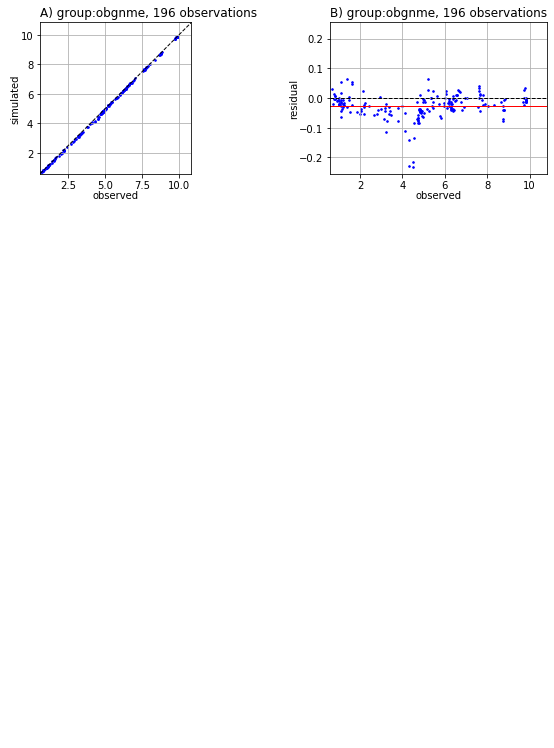

In [4]:
m_d = "master_glm_run"
pst_a = pyemu.Pst(os.path.join(m_d,"{}.pst".format(case)))
pst_a.plot(kind='1to1')

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\en.py:365: UserWarning: Ensemble.from_dataframe() is deprecated and has been replaced with the standard constructor, which takesthe same arguments
  warnings.warn("Ensemble.from_dataframe() is deprecated and has been "


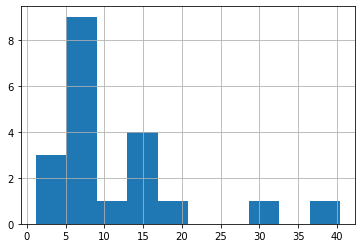

In [5]:
df = df=pd.read_csv(os.path.join(m_d,"{}.post.obsen.csv".format(case)),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)
ax = oe.phi_vector.hist()

In [6]:
dfp = df=pd.read_csv(os.path.join(m_d,"{}.par.usum.csv".format(case)),index_col=0)
10**dfp["post_mean"]

name
KP_INST:0_I:6_J:6      0.100000
KP_INST:0_I:6_J:18     0.100000
KP_INST:0_I:6_J:30     0.120183
KP_INST:0_I:6_J:42     0.933577
KP_INST:0_I:6_J:54     2.160787
                         ...   
KP_INST:0_I:90_J:42    0.717456
KP_INST:0_I:90_J:54    0.108396
KP_INST:0_I:90_J:66    0.460570
KP_INST:0_I:90_J:78    2.454438
KP_INST:0_I:90_J:90    0.844326
Name: post_mean, Length: 64, dtype: float64

(array([40.,  6.,  3.,  1.,  1.,  0.,  3.,  3.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  4.]),
 array([ 0.1 ,  0.43,  0.76,  1.09,  1.42,  1.75,  2.08,  2.41,  2.74,
         3.07,  3.4 ,  3.73,  4.06,  4.39,  4.72,  5.05,  5.38,  5.71,
         6.04,  6.37,  6.7 ,  7.03,  7.36,  7.69,  8.02,  8.35,  8.68,
         9.01,  9.34,  9.67, 10.  ]),
 <a list of 30 Patch objects>)

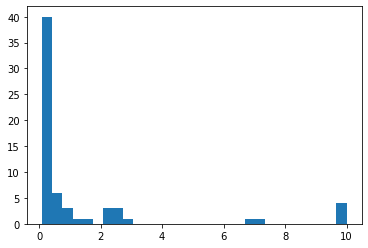

In [7]:
plt.hist(10**dfp["post_mean"],bins=30)

In [8]:
pst.parameter_data.parval1 = 10**dfp["post_mean"].values
pst.control_data.noptmax = 0 # one run with optimal parameters

pst.write(os.path.join(t_d,"{}.pst".format(case)))

pyemu.os_utils.run("..\pestpp-glm.exe {}".format(case),cwd=t_d)

noptmax:0, npar_adj:64, nnz_obs:196


Text(0.5, 1.0, 'k after inversion')

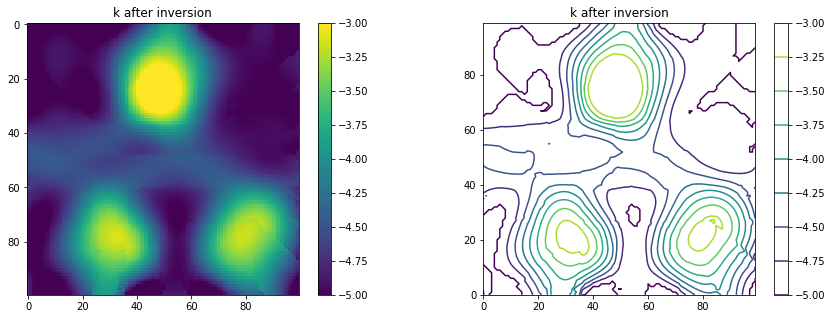

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

# inversion
g= ax[0].imshow(np.log10(np.loadtxt(os.path.join(t_d,"k.txt"))))
plt.colorbar(g,ax=ax[0])
ax[0].set_title("k after inversion")

a=ax[1].contour(np.flipud(np.log10(np.loadtxt(os.path.join(t_d,"k.txt")))))
ax[1].set_aspect("equal")
plt.colorbar(a,ax=ax[1])
plt.title("k after inversion")

Text(0.5, 1.0, 'real K contour')

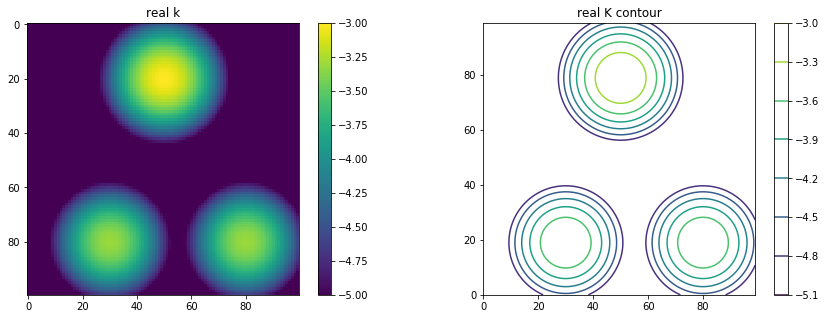

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

# inversion
g= ax[0].imshow(np.log10(np.loadtxt(os.path.join("workspace","k.txt"))))
plt.colorbar(g,ax=ax[0])
ax[0].set_title("real k")

a=ax[1].contour(np.flipud(np.log10(np.loadtxt(os.path.join("workspace","k.txt")))))
ax[1].set_aspect("equal")
plt.colorbar(a,ax=ax[1])
plt.title("real K contour")

17.663945010750588 {'obgnme': 17.663945010750588} {'obgnme': 1.0}


[None,
 None,

<Figure size 576x756 with 0 Axes>

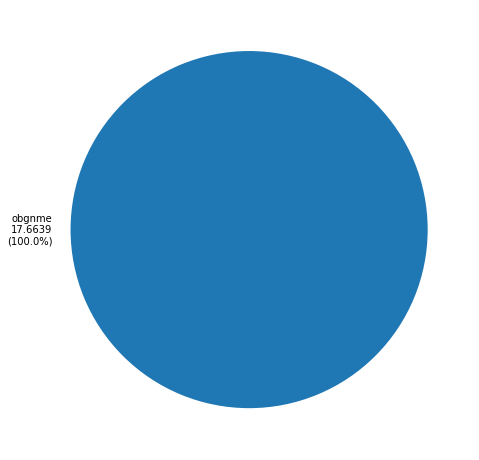

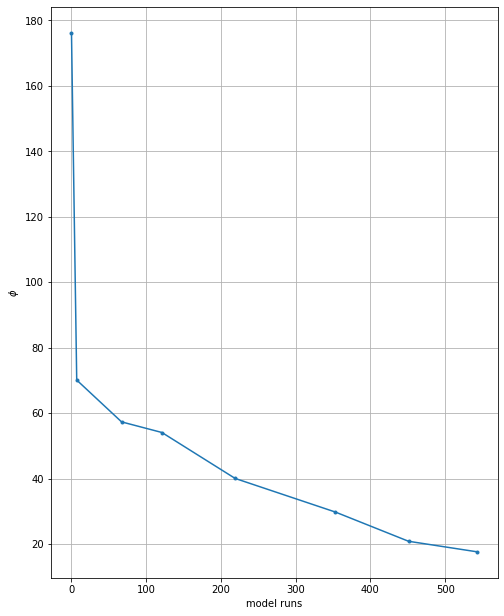

In [11]:
pst_a.plot()